In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_conflation_pair(mu1: float, mu2: float, sig1: float, sig2: float):
    mu = (sig2*mu1 + sig1 * mu2) / (sig1 + sig2)
    var = sig1*sig2 / (sig1 + sig2)
    return mu, var

In [3]:
def get_conflation_array(mus: np.ndarray, sigmas: np.ndarray):
    assert len(mus) == len(sigmas)
    m = len(mus)
    
    for i in range(m-1):
        m1 = mus[i]
        m2 = mus[i+1]
        s1 = sigmas[i]
        s2 = sigmas[i+1]
        print(m1, m2)
        print(s1, s2)
        if i == 0:
            mu_star = m1
            var_star = s1
        mu_star, var_star = get_conflation_pair(mu_star, m2, var_star, s2)
        print(mu_star, var_star)
        
    return mu_star, var_star

        

In [32]:
def get_mixture_from_array(mus: np.array, sigmas: np.ndarray):
    # equation from Lakshminarayanan 2017
    mu_star = np.mean(mus)
    var_star = np.mean(sigmas + np.power(mus, 2)) - mu_star
    return mu_star, var_star

## Two Gaussians

In [33]:
mu1 = -10.0
mu2 = 10.0

In [82]:
sig2_1 = 3.0
sig2_2 = 0.2

In [83]:
x1 = np.random.normal(mu1, sig2_1, size=10000)
x2 = np.random.normal(mu2, sig2_2, size=10000)

In [84]:
mu_star, sig2_star = get_conflation_pair(mu1, mu2, sig2_1, sig2_2)

In [85]:
mu_star, sig2_star

(8.75, 0.18750000000000003)

In [86]:
mu_star_mix, sig2_star_mix = get_mixture_from_array([mu1, mu2], [sig2_1, sig2_2])

In [87]:
mu_star_mix

0.0

In [88]:
sig2_star_mix

101.6

In [89]:
x_star = np.random.normal(mu_star, np.sqrt(sig2_star), size=10000)
x_star_mix = np.random.normal(mu_star_mix, np.sqrt(sig2_star_mix), size=10000)

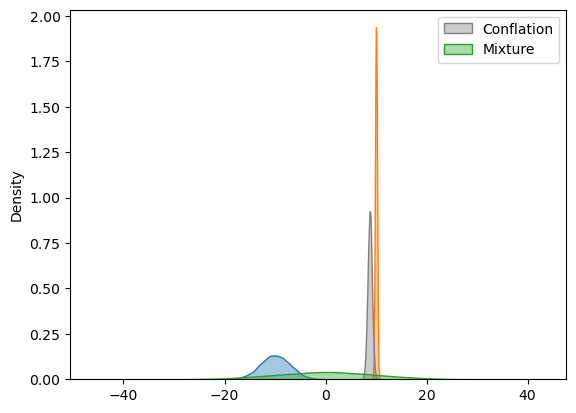

In [90]:
sns.kdeplot(x1,  fill=True, alpha=0.4)
sns.kdeplot(x2,  fill=True, alpha=0.4)
sns.kdeplot(x_star, color='gray', fill=True, alpha=0.4, label='Conflation')
sns.kdeplot(x_star_mix, fill=True, alpha=0.4, label='Mixture')


plt.legend()
plt.show()

## Multiple Gaussians

In [75]:

mus = np.array([-4.0, -3.5, -4.5, -3.8, 3.0])
#sigmas = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
sigmas = np.random.exponential(3, size=5)

mu_star, var_star = get_conflation_array(mus=mus, sigmas=sigmas)

-4.0 -3.5
0.7701052132400907 2.212019102277337
-3.8708797602378837 0.5712328736888592
-3.5 -4.5
2.212019102277337 0.3620430956606873
-4.255947172512097 0.22159674600601081
-4.5 -3.8
0.3620430956606873 0.7023049824110674
-4.146588777921335 0.16844702636582318
-3.8 3.0
0.7023049824110674 1.5379971506079815
-3.441132575752999 0.15181923327750355


In [76]:
sigmas

array([0.77010521, 2.2120191 , 0.3620431 , 0.70230498, 1.53799715])

In [77]:
mu_star, sig2_star = get_conflation_pair(mus[0], mus[1], sigmas[0], sigmas[1])

In [78]:
print(mu_star, sig2_star)

-3.441132575752999 1.5


In [79]:
mu_star_mix, sig2_star_mix = get_mixture_from_array(mus, sigmas)

In [80]:
x_star = np.random.normal(mu_star, np.sqrt(sig2_star), size=10000)
x_star_mix = np.random.normal(mu_star_mix, np.sqrt(sig2_star_mix), size=10000)


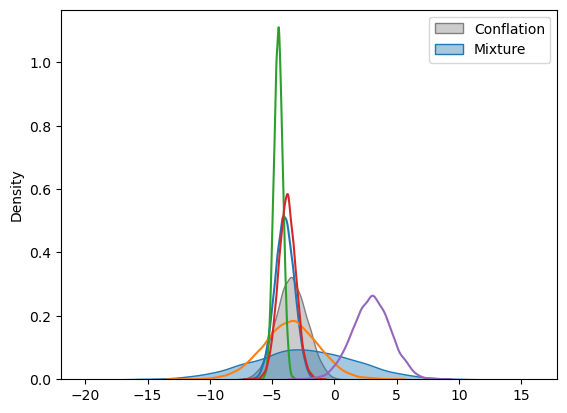

In [81]:
for m, s in zip(mus, sigmas):
    x = np.random.normal(m, s, size=10000)
    sns.kdeplot(x)

sns.kdeplot(x_star, color='gray', fill=True, alpha=0.4, label="Conflation")
sns.kdeplot(x_star_mix, fill=True, alpha=0.4, label="Mixture")
plt.legend()
plt.show()